# chemicalFormula of Semiconductor Predict

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pymatgen.core.composition import Composition
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers import composition as cf
import matminer
from matminer.featurizers.composition import ElementProperty

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
import random

In [7]:
df=pd.read_csv("bandgap_data_v2.csv")  
print(df.shape) 
df.head()

(1447, 6)


,index,chemicalFormula Clean,Band gap values Clean,Band gap units,Band gap method,Reliability
0,0,Li1F1,13.60,eV,Reflection,1
1,1,Li1F1,12.61,eV,Reflection,1
2,2,Li1F1,12.60,eV,Estimated,2
3,3,Li1F1,12.10,eV,Absorption,2
4,4,Li1F1,12.00,eV,Absorption,2


## 원본 데이터 전처리

 Reliability = 1 추출

In [8]:
df_Reliability_1 = df[df["Reliability"]== 1]
print(df_Reliability_1.shape) 
df_Reliability_1.head() 

(535, 6)


,index,chemicalFormula Clean,Band gap values Clean,Band gap units,Band gap method,Reliability
0,0,Li1F1,13.60,eV,Reflection,1
1,1,Li1F1,12.61,eV,Reflection,1
6,6,Li1Cl1,9.33,eV,Reflection,1
7,7,Li1Br1,7.95,eV,Absorption,1
9,9,Li3Sb1,1.00,eV,Thermal activation,1


chemicalFormula 그룹화 (value를 평균값으로) 

문자로 구성된 열은 자동필터링

In [9]:
df_clean = df_Reliability_1.groupby("chemicalFormula Clean", as_index=False).mean()  # 정해진컬럼 같은거 그룹화 해서 평균취하기
print(df_clean.shape) 
df_clean.head() 

(467, 4)


,chemicalFormula Clean,index,Band gap values Clean,Reliability
0,Ag1Br1,808.5,3.485,1.0
1,Ag1Cl1,793.5,4.190,1.0
2,Ag1N3,783.0,3.900,1.0
3,Ag1Te1,820.0,0.850,1.0
4,Ag2O1,785.0,1.200,1.0


target(밴드갭) --> 분포도 확인

In [10]:
df_clean["Band gap values Clean"].describe().round(3)

count    467.000
mean       2.231
std        2.287
min        0.009
25%        0.695
50%        1.435
75%        3.000
max       13.105
Name: Band gap values Clean, dtype: float64

In [11]:
def histogram_plot(data):
    fig1, ax1 = plt.subplots()
    ax1.hist(data, bins=range(13), density=1)
    ax1.set_xticks(range(14))
    ax1.set_xlabel('Measured Bandgap [eV]')
    ax1.set_ylabel('Counts [fraction]')
    plt.show()

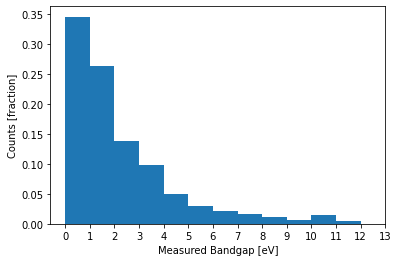

In [14]:
histogram_plot(df_clean["Band gap values Clean"].astype("float"))

<AxesSubplot:xlabel='Band gap values Clean'>

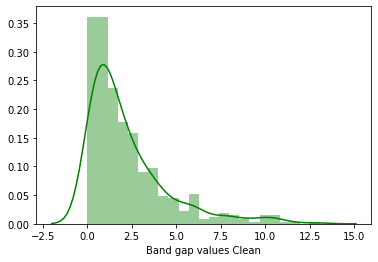

In [15]:
sns.distplot(df_clean["Band gap values Clean"], color="green")

## 각 chemicalFormula의 특성들을 get_composition함수를 사용해 추가함

In [18]:
def get_composition(c):
    try:
        return Composition(c)
    except:
        return None

In [19]:
df_clean["composition"] = df_clean["chemicalFormula Clean"].apply(get_composition)

In [20]:
df_clean.head(3)

,chemicalFormula Clean,index,Band gap values Clean,Reliability,composition
0,Ag1Br1,808.5,3.485,1.0,"(Ag, Br)"
1,Ag1Cl1,793.5,4.190,1.0,"(Ag, Cl)"
2,Ag1N3,783.0,3.900,1.0,"(Ag, N)"


chemicalFormula들의 magpie 값

In [31]:
ep_feat = ElementProperty.from_preset(preset_name = 'magpie')
df_magpie = ep_feat.featurize_dataframe(df_clean, col_id ="composition")
print(df_magpie.shape)
df_magpie.head()


(467, 137)


,chemicalFormula Clean,index,Band gap values Clean,Reliability,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Ag1Br1,808.5,3.485,1.0,"(Ag, Br)",35.0,47.0,12.0,41.0,6.000000,...,0.0,0.0,0.0,0.0,64.0,225.0,161.0,144.50,80.500000,64.0
1,Ag1Cl1,793.5,4.190,1.0,"(Ag, Cl)",17.0,47.0,30.0,32.0,15.000000,...,0.0,0.0,0.0,0.0,64.0,225.0,161.0,144.50,80.500000,64.0
2,Ag1N3,783.0,3.900,1.0,"(Ag, N)",7.0,47.0,40.0,17.0,15.000000,...,0.0,0.0,0.0,0.0,194.0,225.0,31.0,201.75,11.625000,194.0
3,Ag1Te1,820.0,0.850,1.0,"(Ag, Te)",47.0,52.0,5.0,49.5,2.500000,...,0.0,0.0,0.0,0.0,152.0,225.0,73.0,188.50,36.500000,152.0
4,Ag2O1,785.0,1.200,1.0,"(Ag, O)",8.0,47.0,39.0,34.0,17.333333,...,0.0,0.0,0.0,0.0,12.0,225.0,213.0,154.00,94.666667,225.0


In [32]:
df_magpie.columns[5:]

Index(['MagpieData minimum Number', 'MagpieData maximum Number',
       'MagpieData range Number', 'MagpieData mean Number',
       'MagpieData avg_dev Number', 'MagpieData mode Number',
       'MagpieData minimum MendeleevNumber',
       'MagpieData maximum MendeleevNumber',
       'MagpieData range MendeleevNumber', 'MagpieData mean MendeleevNumber',
       ...
       'MagpieData range GSmagmom', 'MagpieData mean GSmagmom',
       'MagpieData avg_dev GSmagmom', 'MagpieData mode GSmagmom',
       'MagpieData minimum SpaceGroupNumber',
       'MagpieData maximum SpaceGroupNumber',
       'MagpieData range SpaceGroupNumber', 'MagpieData mean SpaceGroupNumber',
       'MagpieData avg_dev SpaceGroupNumber',
       'MagpieData mode SpaceGroupNumber'],
      dtype='object', length=132)

chemicalFormula들의 norm 값

In [33]:
ep_feat = MultipleFeaturizer([cf.Stoichiometry()])
df_norm = ep_feat.featurize_dataframe(df_clean, col_id ="composition")
print(df_norm.shape)
df_norm.head()


(467, 11)


,chemicalFormula Clean,index,Band gap values Clean,Reliability,composition,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm
0,Ag1Br1,808.5,3.485,1.0,"(Ag, Br)",2,0.707107,0.629961,0.574349,0.552045,0.535887
1,Ag1Cl1,793.5,4.190,1.0,"(Ag, Cl)",2,0.707107,0.629961,0.574349,0.552045,0.535887
2,Ag1N3,783.0,3.900,1.0,"(Ag, N)",2,0.790569,0.759147,0.750616,0.750049,0.750001
3,Ag1Te1,820.0,0.850,1.0,"(Ag, Te)",2,0.707107,0.629961,0.574349,0.552045,0.535887
4,Ag2O1,785.0,1.200,1.0,"(Ag, O)",2,0.745356,0.693361,0.670782,0.667408,0.666732


In [35]:
df_norm.columns[5:]

Index(['0-norm', '2-norm', '3-norm', '5-norm', '7-norm', '10-norm'], dtype='object')

chemicalFormula들의 avg 값

In [37]:
ep_feat = MultipleFeaturizer([cf.ValenceOrbital(props=["avg"])])
df_avg = ep_feat.featurize_dataframe(df_clean, col_id ="composition")
print(df_avg.shape)
df_avg.head()


(467, 9)


,chemicalFormula Clean,index,Band gap values Clean,Reliability,composition,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons
0,Ag1Br1,808.5,3.485,1.0,"(Ag, Br)",1.500000,2.500000,10.000000,0.0
1,Ag1Cl1,793.5,4.190,1.0,"(Ag, Cl)",1.500000,2.500000,5.000000,0.0
2,Ag1N3,783.0,3.900,1.0,"(Ag, N)",1.750000,2.250000,2.500000,0.0
3,Ag1Te1,820.0,0.850,1.0,"(Ag, Te)",1.500000,2.000000,10.000000,0.0
4,Ag2O1,785.0,1.200,1.0,"(Ag, O)",1.333333,1.333333,6.666667,0.0


In [38]:
df_avg.columns[5:]

Index(['avg s valence electrons', 'avg p valence electrons',
       'avg d valence electrons', 'avg f valence electrons'],
      dtype='object')

chemicalFormula들의 norm 값

In [39]:
ep_feat = MultipleFeaturizer([cf.ElementFraction()])
df_ele = ep_feat.featurize_dataframe(df_clean, col_id ="composition")
print(df_ele.shape)
df_ele.head()


(467, 108)


,chemicalFormula Clean,index,Band gap values Clean,Reliability,composition,H,He,Li,Be,B,...,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr
0,Ag1Br1,808.5,3.485,1.0,"(Ag, Br)",0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Ag1Cl1,793.5,4.190,1.0,"(Ag, Cl)",0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Ag1N3,783.0,3.900,1.0,"(Ag, N)",0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,Ag1Te1,820.0,0.850,1.0,"(Ag, Te)",0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Ag2O1,785.0,1.200,1.0,"(Ag, O)",0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df_ele.columns[5:]

Index(['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne',
       ...
       'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr'],
      dtype='object', length=103)

## get_composition을 활용한 chemicalFormula의 특성들을 합침

In [42]:
f = MultipleFeaturizer([cf.Stoichiometry(), cf.ElementProperty.from_preset("magpie"),
                       cf.ValenceOrbital(props=["avg"]), cf.ElementFraction()])

In [79]:
df_feature=pd.DataFrame()
df_feature['composition'] =df_clean['composition'] 

df_feature= f.featurize_dataframe(df_feature,col_id='composition')
df_feature.head()

,composition,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,...,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr
0,"(Ag, Br)",2,0.707107,0.629961,0.574349,0.552045,0.535887,35.0,47.0,12.0,...,0,0,0,0,0,0,0,0,0,0
1,"(Ag, Cl)",2,0.707107,0.629961,0.574349,0.552045,0.535887,17.0,47.0,30.0,...,0,0,0,0,0,0,0,0,0,0
2,"(Ag, N)",2,0.790569,0.759147,0.750616,0.750049,0.750001,7.0,47.0,40.0,...,0,0,0,0,0,0,0,0,0,0
3,"(Ag, Te)",2,0.707107,0.629961,0.574349,0.552045,0.535887,47.0,52.0,5.0,...,0,0,0,0,0,0,0,0,0,0
4,"(Ag, O)",2,0.745356,0.693361,0.670782,0.667408,0.666732,8.0,47.0,39.0,...,0,0,0,0,0,0,0,0,0,0


composition column은 학습할 때 필요 없기 때문에 drop

In [85]:
df_feature_2=df_feature.drop(['composition'], axis=1)
print("shape : ",df_feature_2.shape)
df_feature_2.head()

shape :  (467, 245)


,0-norm,2-norm,3-norm,5-norm,7-norm,10-norm,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,...,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr
0,2,0.707107,0.629961,0.574349,0.552045,0.535887,35.0,47.0,12.0,41.0,...,0,0,0,0,0,0,0,0,0,0
1,2,0.707107,0.629961,0.574349,0.552045,0.535887,17.0,47.0,30.0,32.0,...,0,0,0,0,0,0,0,0,0,0
2,2,0.790569,0.759147,0.750616,0.750049,0.750001,7.0,47.0,40.0,17.0,...,0,0,0,0,0,0,0,0,0,0
3,2,0.707107,0.629961,0.574349,0.552045,0.535887,47.0,52.0,5.0,49.5,...,0,0,0,0,0,0,0,0,0,0
4,2,0.745356,0.693361,0.670782,0.667408,0.666732,8.0,47.0,39.0,34.0,...,0,0,0,0,0,0,0,0,0,0


## df_feature_2 전처리

std가0인 columns는 학습데이터에서 제외

In [89]:
finding_columns=df_feature_2.loc[:, df_feature.std() == 0]
findling_columns_list=finding_columns.columns
findling_columns_list
df_feature_2 = df_feature_2.drop(findling_columns_list,axis=1)
df_feature_2.shape

(467, 215)

pearson correlation method

-0.95 이하 또는 +0.95 이상의 상관관계를 가지는 column는 제외

In [90]:
# Remove Highly correlated Features
# using notes here for methodology: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

features_corr_df = df_feature_2.corr(method="pearson").abs()
features_corr_df.iloc[:5, :5] # Preview the first 5 rows/columns of the correlation matrix

,0-norm,2-norm,3-norm,5-norm,7-norm
0-norm,1.000000,0.807060,0.747765,0.684427,0.653834
2-norm,0.807060,1.000000,0.994481,0.976386,0.962693
3-norm,0.747765,0.994481,1.000000,0.993388,0.984962
5-norm,0.684427,0.976386,0.993388,1.000000,0.998202
7-norm,0.653834,0.962693,0.984962,0.998202,1.000000


### before removing correlated features

In [93]:
def plot_corr(data):
    fig1, ax1 = plt.subplots(figsize=(10,5))
    c = ax1.pcolor(data,cmap="Blues")
    ax1.set_ylim(ax1.get_ylim()[::-1])
    ax1.xaxis.set_ticks_position('top')
    ax1.xaxis.set_label_position('top')
    ax1.set_xlabel('Feature Numbers')
    ax1.set_ylabel('Feature Numbers')
    ax1.set_aspect('equal')
    plt.colorbar(c,ax=ax1)
    plt.show()

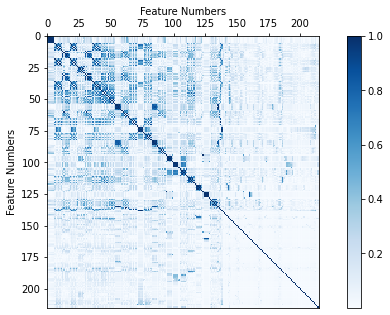

In [94]:
plot_corr(features_corr_df)

상관계수가 0.95이상인 열 제거

In [100]:
upper = features_corr_df.where(np.triu(np.ones(features_corr_df.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
features_df_lowcorr = df_feature_2.drop(columns=to_drop)
features_df_lowcorr.shape

(467, 163)

recalculate the correlation matrix so we can compare

In [97]:
features_corr_df_update = features_df_lowcorr.corr(method="pearson").abs()

### after removing correlated features 

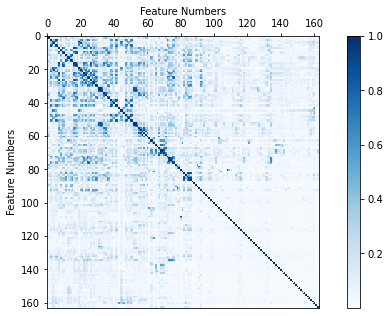

In [98]:
plot_corr(features_corr_df_update)

## plot correlation after removing highly correlated features

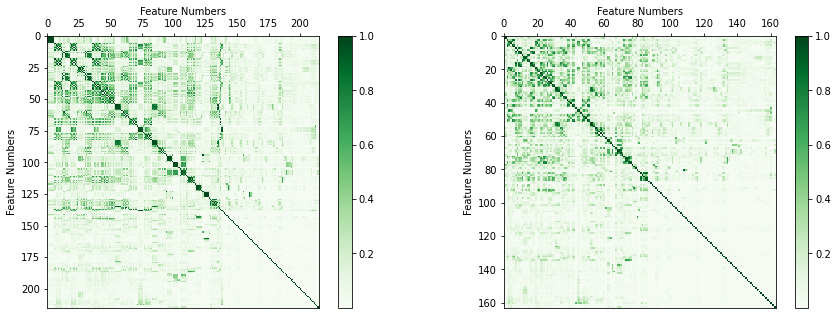

In [99]:
colormap = plt.cm.Greens

fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
c1 = ax1.pcolor(features_corr_df,cmap=colormap)
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.xaxis.set_ticks_position('top')
ax1.xaxis.set_label_position('top')
ax1.set_xlabel('Feature Numbers')
ax1.set_ylabel('Feature Numbers')
ax1.set_aspect('equal')

plt.colorbar(c1,ax=ax1)



c2 = ax2.pcolor(features_corr_df_update,cmap=colormap)
ax2.set_ylim(ax2.get_ylim()[::-1])
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_label_position('top')
ax2.set_xlabel('Feature Numbers')
ax2.set_ylabel('Feature Numbers')
ax2.set_aspect('equal')
plt.colorbar(c2,ax=ax2)
plt.show()

## 표준편차가0, 높은 상관계수 열 제거한 상태에서 MinMaxScaler

In [106]:
minmax_feature = MinMaxScaler().fit_transform(features_df_lowcorr)
df_minmax_feature=pd.DataFrame(minmax_feature, columns=features_df_lowcorr.columns)
print(df_minmax_feature.shape)
df_minmax_feature.head()

(467, 163)


,0-norm,2-norm,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData mean MendeleevNumber,...,Re,Os,Ir,Pt,Hg,Tl,Pb,Bi,Th,U
0,1.0,0.000000,0.4000,0.482759,0.142857,0.461538,0.400,0.673684,0.975610,0.783784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.000000,0.1750,0.482759,0.357143,0.346154,0.175,0.673684,0.951220,0.777027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.284959,0.0500,0.482759,0.476190,0.153846,0.050,0.673684,0.658537,0.753378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.000000,0.5500,0.540230,0.059524,0.570513,0.550,0.673684,0.853659,0.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.130591,0.0625,0.482759,0.464286,0.371795,0.550,0.673684,0.780488,0.680180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## X, y 데이터

In [107]:
X=df_minmax_feature
y=y_value

# training data  --> 모델  --> test 검증 : train(0.9), test (0.1)

In [108]:
seed =np.random.seed(22)  # random seed를 결정

In [109]:
test_fraction =0.1

In [110]:
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=test_fraction, shuffle=True, random_state=seed)

## X,y의 train, test가 적절히 잘 분배되었는지 확인

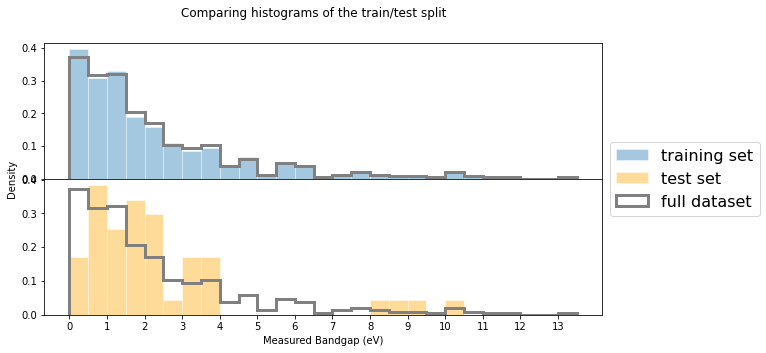

In [115]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10,5), sharex = True, gridspec_kw={'hspace': 0})
fig.set_tight_layout(False)
myarray = df_clean["Band gap values Clean"]

bins = np.true_divide(range(28),2)

l1 = sns.distplot(y_train.astype("float"), hist = True, norm_hist = True, kde = False, 
                  bins = bins, hist_kws={"edgecolor": "white"}, label = 'training set', ax = ax1)
l2 = sns.distplot(y_test.astype("float"), hist = True, norm_hist = True, kde = False, 
                  bins = bins, hist_kws={"edgecolor": "white", "color": "orange"}, label = 'test set', ax = ax2)
l3 = sns.distplot(myarray, hist = True, norm_hist = True, kde = False, 
                  bins = bins, hist_kws={"histtype": "step","linewidth": 3, "alpha": 1, "color": "grey"}, ax = ax1)
l4 = sns.distplot(myarray, hist = True, norm_hist = True, kde = False, 
                  bins = bins, hist_kws={"histtype": "step","linewidth": 3, "alpha": 1, "color": "grey"}, 
                  label = 'full dataset', ax = ax2)


ax1.set_xticks(range(14))
ax2.set_xticks(range(14))
ax2.xaxis.label.set_visible(False)
handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.suptitle('Comparing histograms of the train/test split')
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.legend(handles, labels, loc = 'center left', bbox_to_anchor=(1, 0.5),prop={'size': 16})
plt.xlabel('Measured Bandgap (eV)')
_ = plt.ylabel('Density')

In [116]:
import utils

In [117]:
from helper_functions import *

In [119]:
from sklearn.model_selection import GridSearchCV  # 매개변수를 자동으로 변수 설정해서 최적 찾기 위한 방법
from sklearn.model_selection import cross_validate  # 교차 검증
from sklearn.model_selection import KFold  # 몇번 나눌지
from sklearn.model_selection import cross_val_score  # 교차검증시의 성능지표
from sklearn.metrics import r2_score, mean_squared_error  # SVR 모델의 예측과 실제의 결과를 확인하는 성능지표

In [120]:
from sklearn.ensemble import RandomForestRegressor

In [121]:
from sklearn.model_selection import cross_validate, GridSearchCV, ParameterGrid
from sklearn.model_selection import KFold, RepeatedKFold

In [122]:
model = RandomForestRegressor(random_state=seed, bootstrap=True ).fit(X_train,y_train)

In [123]:
cv = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [124]:
parameter_candidates = {
    'n_estimators': [500],   
    'max_features': [20],
    'max_depth': [10],
    "min_samples_leaf": [1],
    "min_samples_split": [2]  
}

In [125]:
grid=GridSearchCV(estimator=model,
                 param_grid=parameter_candidates,
                 cv=cv)

In [126]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10], 'max_features': [20],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [500]})

In [127]:
best_parameters =grid.best_params_
print(best_parameters)

{'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [128]:
final_model=RandomForestRegressor(**best_parameters, random_state=seed)
final_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=20, n_estimators=500)

In [129]:
Train_pred=final_model.predict(X_train)
Test_pred=final_model.predict(X_test)

r2 score:0.840, rmse:0.932


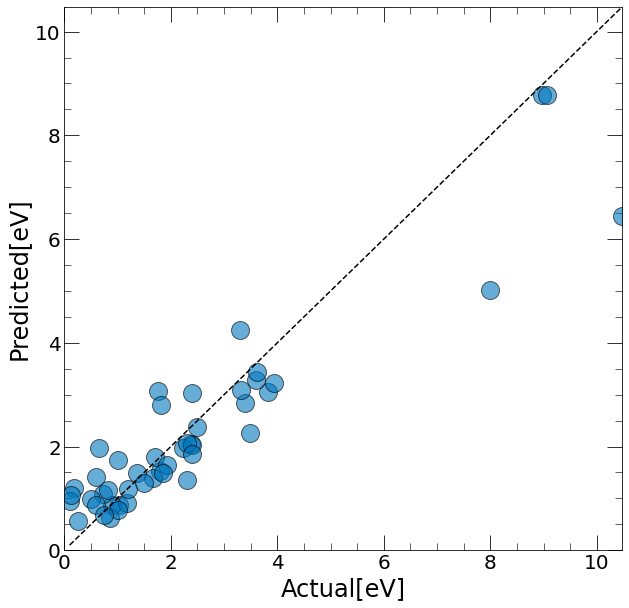

In [130]:
utils.plot_act_vs_pred(y_test,Test_pred)
score=r2_score(y_test,Test_pred)
rmse =np.sqrt(mean_squared_error(y_test,Test_pred ))
print("r2 score:{:0.3f}, rmse:{:0.3f}".format(score, rmse))

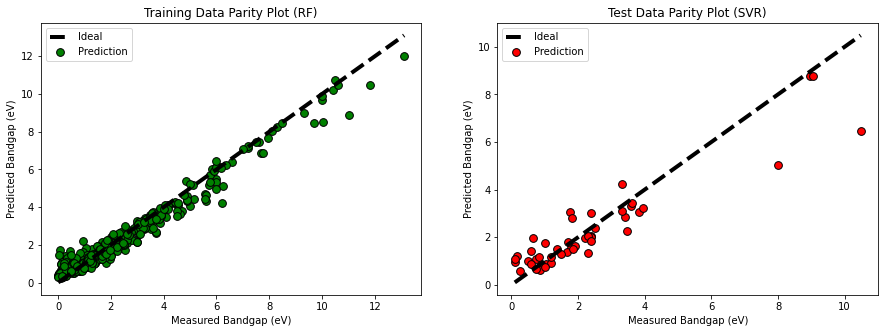

,Error Metric,Training Set (train),test set,Note
0,RMSE,0.4568 (eV),0.9321 (eV),(0.0 for perfect prediction)
1,RMSE/std,0.2004,0.4005,(0.0 for perfect prediction)
2,MAE,0.3359 (eV),0.601 (eV),(0.0 for perfect prediction)
3,R2,0.9598,0.8396,(1.0 for perfect prediction)


In [131]:
parity_plots_side_by_side(y_train,Train_pred ,y_test,
                          Test_pred ,title_left="Training Data Parity Plot (RF)",title_right="Test Data Parity Plot (SVR)") # build both plots
parity_stats_side_by_side(y_train,Train_pred,y_test,
                          Test_pred ,"Training Set (train)","test set")

## column이 많기 때문에 특성중요도가 높은 것만 학습

## 1번째 방법 Feature importance based on mean decrease in impurity

In [135]:
m = final_model

In [136]:
import time

start_time = time.time()
importances = m.feature_importances_
std = np.std([m.feature_importances_ for tree in m.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 28.372 seconds


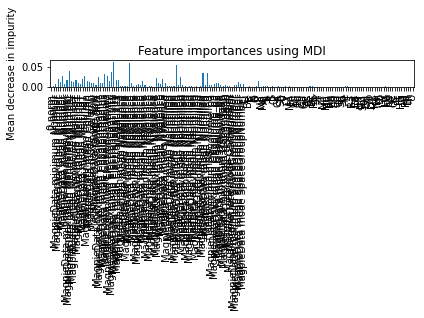

In [137]:
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [142]:
forest_importances_df = pd.DataFrame(forest_importances, index = X_train.columns, columns = ["Importance"])
forest_importances_df_sorted = forest_importances_df.sort_values(by='Importance', ascending = False)
forest_importances_df_sorted.head()

,Importance
MagpieData range Electronegativity,0.063350
MagpieData range NpValence,0.060658
MagpieData maximum NpUnfilled,0.055583
MagpieData maximum MendeleevNumber,0.039980
MagpieData maximum Electronegativity,0.036747


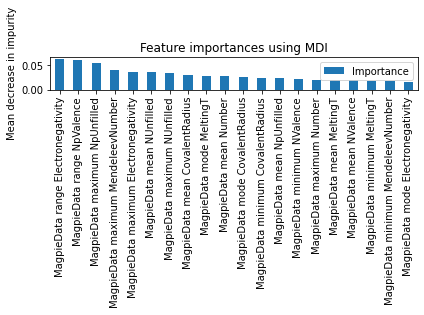

In [143]:
fig, ax = plt.subplots()
forest_importances_df_sorted[:20].plot.bar(yerr=std[0:20], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [144]:
# 특성중요도 20개
top20_importance_feature = forest_importances_df_sorted[:20].index

In [145]:
top20_importance_feature

Index(['MagpieData range Electronegativity', 'MagpieData range NpValence',
       'MagpieData maximum NpUnfilled', 'MagpieData maximum MendeleevNumber',
       'MagpieData maximum Electronegativity', 'MagpieData mean NUnfilled',
       'MagpieData maximum NUnfilled', 'MagpieData mean CovalentRadius',
       'MagpieData mode MeltingT', 'MagpieData mean Number',
       'MagpieData mode CovalentRadius', 'MagpieData minimum CovalentRadius',
       'MagpieData mean NpUnfilled', 'MagpieData minimum NValence',
       'MagpieData maximum Number', 'MagpieData mean MeltingT',
       'MagpieData mean NValence', 'MagpieData minimum MeltingT',
       'MagpieData minimum MendeleevNumber',
       'MagpieData mode Electronegativity'],
      dtype='object')

In [146]:
# 특성 중요도가 제일 높았던 20개의 feature값을 X로
X = df_minmax_feature[top20_importance_feature]

In [147]:
# train. test 분류
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=test_fraction, shuffle=True, random_state=seed) 

In [148]:
model_1 = RandomForestRegressor(random_state=seed, bootstrap=True ).fit(X_train,y_train)

In [149]:
cv = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [150]:
parameter_candidates = {
    'n_estimators': [500],   
    'max_features': [20],
    'max_depth': [10],
    "min_samples_leaf": [1],
    "min_samples_split": [2]  
}

In [151]:
grid=GridSearchCV(estimator=model,
                 param_grid=parameter_candidates,
                 cv=cv)

In [152]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10], 'max_features': [20],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [500]})

In [132]:
best_parameters =grid.best_params_
print(best_parameters)

{'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [153]:
final_model_1=RandomForestRegressor(**best_parameters, random_state=seed)

In [154]:
final_model_1.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=20, n_estimators=500)

In [155]:
Train_pred=final_model_1.predict(X_train)
Test_pred=final_model_1.predict(X_test)

r2 score:0.701, rmse:1.134


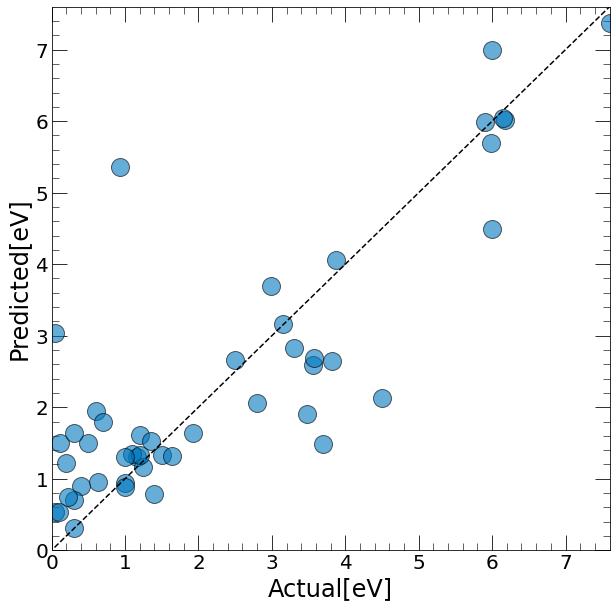

In [156]:
utils.plot_act_vs_pred(y_test,Test_pred)
score=r2_score(y_test,Test_pred)
rmse =np.sqrt(mean_squared_error(y_test,Test_pred ))
print("r2 score:{:0.3f}, rmse:{:0.3f}".format(score, rmse))

r2 score:0.665, rmse:1.200
RMSE0.3641 (eV) 1.2003 (eV)
RMSE/std0.1579 0.5788
MAE0.2458 (eV) 0.8102 (eV)
R20.9751       0.665

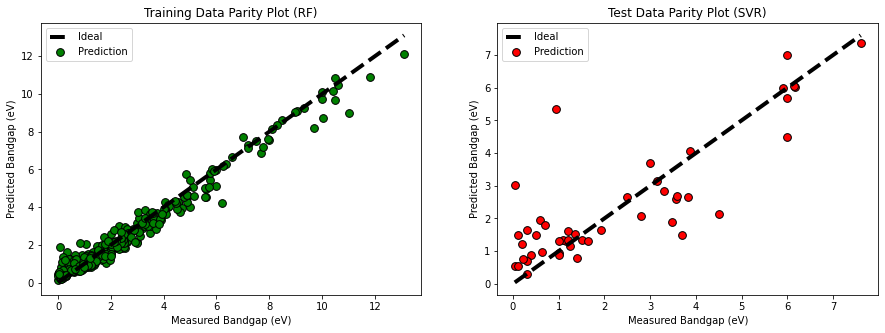

,Error Metric,Training Set (train),test set,Note
0,RMSE,0.427 (eV),1.134 (eV),(0.0 for perfect prediction)
1,RMSE/std,0.1851,0.5468,(0.0 for perfect prediction)
2,MAE,0.3126 (eV),0.7489 (eV),(0.0 for perfect prediction)
3,R2,0.9657,0.701,(1.0 for perfect prediction)


In [157]:
parity_plots_side_by_side(y_train,Train_pred ,y_test,
                          Test_pred ,title_left="Training Data Parity Plot (RF)",title_right="Test Data Parity Plot (SVR)") # build both plots
parity_stats_side_by_side(y_train,Train_pred,y_test,
                          Test_pred ,"Training Set (train)","test set")

# 2번째 방법 Feature importance based on feature permutation

In [158]:
# 2번째 방법을 하기 위해 X,y 데이터를 전처리 이전의 데이터로 복구

X = df_minmax_feature.iloc[:,:163]
y = y_value
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=test_fraction, shuffle=True, random_state=seed) 

In [159]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    m, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=X_train.columns)

Elapsed time to compute the importances: 67.243 seconds


In [160]:
forest_importances_df_2 = pd.DataFrame(forest_importances, index = X_train.columns, columns = ["Importance"])
forest_importances_df_2_sorted = forest_importances_df_2.sort_values(by='Importance', ascending = False)
forest_importances_df_2_sorted.head()

,Importance
MagpieData range Electronegativity,0.035507
MagpieData mean CovalentRadius,0.024377
MagpieData maximum Electronegativity,0.024080
MagpieData mean NUnfilled,0.019647
MagpieData range NpValence,0.019100


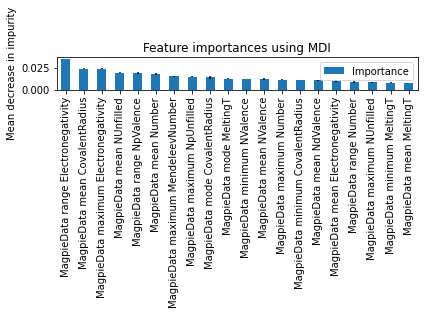

In [161]:
fig, ax = plt.subplots()
forest_importances_df_2_sorted[:20].plot.bar(yerr=result.importances_std[0:20], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [162]:
# 특성중요도 20개
top20_importance_feature_2 = forest_importances_df_2_sorted[:20].index

In [163]:
# 특성 중요도가 제일 높았던 20개의 feature값을 X로
X = df_minmax_feature[top20_importance_feature_2]

In [164]:
# train. test 분류
X_train, X_test,y_train,y_test=train_test_split(X,y, test_size=test_fraction, shuffle=True, random_state=seed) 

In [165]:
model_2 = RandomForestRegressor(random_state=seed, bootstrap=True ).fit(X_train,y_train)

In [166]:
cv = KFold(n_splits = 5, shuffle = True, random_state=seed)

In [167]:
parameter_candidates = {
    'n_estimators': [500],   
    'max_features': [20],
    'max_depth': [10],
    "min_samples_leaf": [1],
    "min_samples_split": [2]  
}

In [168]:
grid=GridSearchCV(estimator=model_2,
                 param_grid=parameter_candidates,
                 cv=cv)

In [169]:
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10], 'max_features': [20],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [500]})

In [170]:
best_parameters =grid.best_params_
print(best_parameters)

{'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [171]:
final_model_2=RandomForestRegressor(**best_parameters, random_state=seed)

In [172]:
final_model_2.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=20, n_estimators=500)

In [173]:
Train_pred=final_model_2.predict(X_train)
Test_pred=final_model_2.predict(X_test)

r2 score:0.883, rmse:0.749


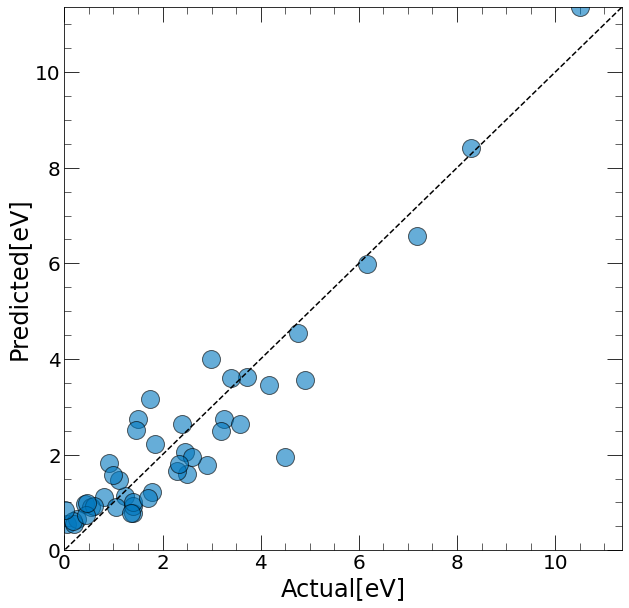

In [174]:
utils.plot_act_vs_pred(y_test,Test_pred)
score=r2_score(y_test,Test_pred)
rmse =np.sqrt(mean_squared_error(y_test,Test_pred ))
print("r2 score:{:0.3f}, rmse:{:0.3f}".format(score, rmse))

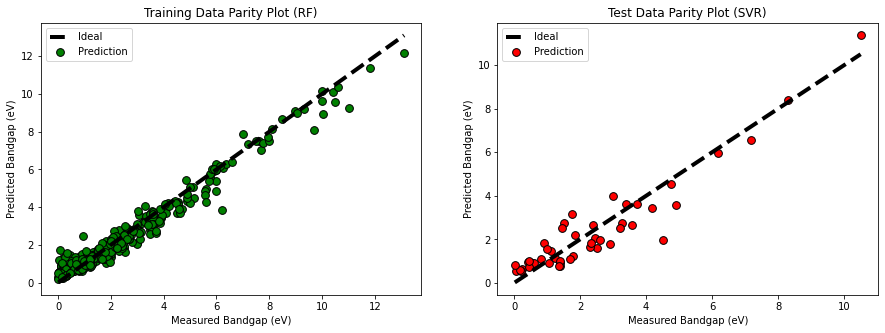

,Error Metric,Training Set (train),test set,Note
0,RMSE,0.4434 (eV),0.7488 (eV),(0.0 for perfect prediction)
1,RMSE/std,0.1933,0.3417,(0.0 for perfect prediction)
2,MAE,0.3231 (eV),0.613 (eV),(0.0 for perfect prediction)
3,R2,0.9626,0.8832,(1.0 for perfect prediction)


In [175]:
parity_plots_side_by_side(y_train,Train_pred ,y_test,
                          Test_pred ,title_left="Training Data Parity Plot (RF)",title_right="Test Data Parity Plot (SVR)") # build both plots
parity_stats_side_by_side(y_train,Train_pred,y_test,
                          Test_pred ,"Training Set (train)","test set")

# 두 번째 방법의 score값이 성능이 좋다.

# def 사용하여 SiN 반도체 재료 밴드갭 예측

In [184]:
def prediction(element, target_value):
    df_formula = pd.DataFrame() # 새로운 df
    df_formula['formula'] = [element] # 예측할 element 변수 입력
    df_formula['target'] = [target_value] # 우리가 알고있는 값,구글링을 통해서 알고 있는값 (실제 값)
    df_formula['Composition'] = df_formula['formula'].apply(get_composition) # get_composition 함수 적용
    
    df_feature_test=pd.DataFrame() # 학습할 df 생성
    df_feature_test['Composition']=df_formula['Composition'] # df 복사
    df_feature_test= f.featurize_dataframe(df_feature_test,col_id='Composition') # 학습할 df의 feature 생성
    
    df_feature_test=df_feature_test[X_train.columns] # 두 번째 방법의 특성중요도가높은 20개의 column
    features_df_lowcorr_1 = features_df_lowcorr[X_train.columns] # 기존의 467 rows 데이터
    features_df_lowcorr_1=features_df_lowcorr_1.append(df_feature_test) # 학습할 데이터 행 추가
    
    minmax_feature_1 = MinMaxScaler().fit_transform(features_df_lowcorr_1) # 합친 df의 minmaxscaler 적용
    df_minmax_feature_1=pd.DataFrame(minmax_feature_1, columns=features_df_lowcorr_1.columns) 
    
    df_feature_corr=df_minmax_feature_1[467:] # 기존의 데이터 제거해서 학습할 데이터 행(마지막 행) 추출 
    y_predicted = final_model_2.predict(df_feature_corr) # 기존의 모델에 학습데이터 적용
    df_formula["predict"] = y_predicted
    return df_formula

In [185]:
prediction("SiN", 4.57) 

,formula,target,Composition,predict
0,SiN,4.57,"(Si, N)",4.546774
